### Algorithm of implementation

- Converted the obtained TIFF file of a perticular index into a grayscale image by mapping the values of TIFF file onto a 0-255 that is grayscale values

- Plotted number of pixels Vs. greyscale values graph to get the idea of the appropraite value of the threshold

- Using the threshold value obtained in a prevoius step, generated the binary valued image from the greyscale image

- While generating the array, calculated the number of ones and zeros to check whether the array is sparse or dense

- Generated the binary file containing the values of the binary image

- Saved/plotted the obtained binary image

### Thresholding for Chilikha Lake NDWI_LMC

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install rasterio

     |████████████████████████████████| 18.3MB 213kB/s 


In [4]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Chilikha/'
image = Image.open(path + 'ndwi_lmc.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  #print(i)
  grey_image.append(temp_row)

print("completed")

completed


5490


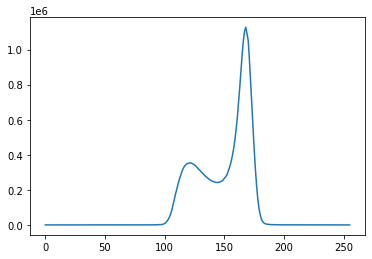

In [5]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [9]:
#Creating binary image array with threshold = 144
bin_image = []
threshold = 144
count_one = 0
count_zero = 0
for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
      count_one = count_one + 1
    else:
      temp_row.append(0)
      count_zero = count_zero + 1

  #print(i)
  bin_image.append(temp_row)

density = count_one/count_zero

if density > 1:
  print("DENSE ARRAY")
elif density < 1:
  print("SPARSE ARRAY")
else:
  print("DENSITY = 1")

DENSE ARRAY


In [10]:
#Generating Binary file of the binary image(numpy array)

file = open('chilikha_ndwi_lmc_binary_t144.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  #print(i)

file.close()

print("completed")

completed


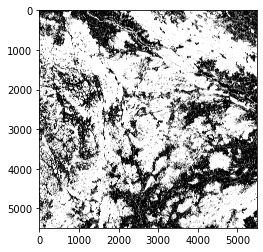

In [11]:
#Plotting the binary image
import matplotlib.pyplot as plt
plt.imshow(bin_image,'gray')

In [12]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('chilikha_ndwi_lmc_t144.png',bin_image,cmap='gray')

### Thresholding for Chilikha lake NDWI_WC

In [13]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Chilikha/'
image = Image.open(path + 'ndwi_wc.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  #print(i)
  grey_image.append(temp_row)

print("Completed")

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Completed


In [14]:
#Converting greyscale image into a numpy array
grey_image_arr = np.array(grey_image)

10980


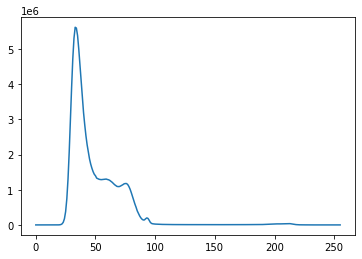

In [ ]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [15]:
#Creating binary image array with threshold = 130
bin_image = []
threshold = 130
count_one = 0
count_zero = 0

for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
      count_one = count_one + 1
    else:
      temp_row.append(0)
      count_zero = count_zero + 1

  #print(i)
  bin_image.append(temp_row)

density = count_one/count_zero

if density > 1:
  print("DENSE ARRAY")
elif density < 1:
  print("SPARSE ARRAY")
else:
  print("DENSITY = 1")

SPARSE ARRAY


In [16]:
#Generating Binary file of the binary image(numpy array)

file = open('chilikha_ndwi_wc_binary_t130.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  #print(i)

file.close()

In [17]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('chilikha_ndwi_wc_t130.png',bin_image,cmap='gray')
print("saved")

saved


### Thresholding for Chilikha lake NDCI

In [18]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Chilikha/'
image = Image.open(path + 'ndci.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  #print(i)
  grey_image.append(temp_row)

print("completed")

completed


5490


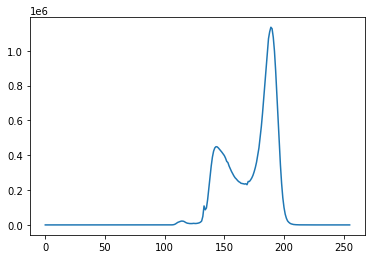

In [19]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [20]:
# Finding the excact occurance of the trough
start = 150

while start < 255:
  if freq[start] < freq[start - 1]:
    if freq[start] < freq[start + 1]:
      break
  start = start + 1

print(start)

167


In [21]:
#Creating binary image array with threshold = 167
bin_image = []
threshold = 167

count_one = 0
count_zero = 0

for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
      count_one = count_one + 1
    else:
      temp_row.append(0)
      count_zero = count_zero + 1

  #print(i)
  bin_image.append(temp_row)

density = count_one/count_zero

if density > 1:
  print("DENSE ARRAY")
elif density < 1:
  print("SPARSE ARRAY")
else:
  print("DENSITY = 1")

DENSE ARRAY


In [22]:
#Generating Binary file of the binary image(numpy array)

file = open('chilikha_ndci_binary_t167.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  #print(i)

file.close()

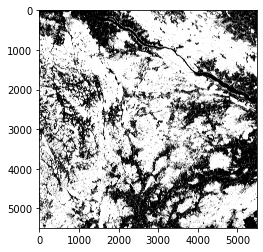

In [23]:
#Plotting the binary image
import matplotlib.pyplot as plt
plt.imshow(bin_image,'gray')

In [24]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('chilikha_ndci_t167.png',bin_image,cmap='gray')
print("saved")

saved


### Thresholding for Okeechobee lake NDWI_LMC

In [25]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Okeechobee/'
image = Image.open(path + 'ndwi_lmc.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  #print(i)
  grey_image.append(temp_row)

print("completed")

completed


5490


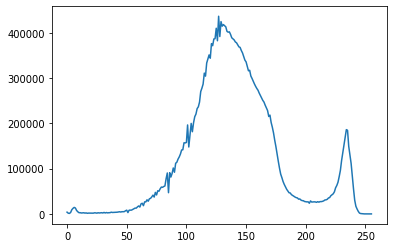

In [26]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [27]:
#Finding exact occurance of the trough
start = 175

while start < 255:
  if freq[start] < freq[start - 1]:
    if freq[start] < freq[start + 1]:
      break
  start = start + 1

print(start)

194


In [28]:
#Creating binary image array with threshold = 194
bin_image = []
threshold = 194

count_one = 0
count_zero = 0

for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
      count_one = count_one + 1
    else:
      temp_row.append(0)
      count_zero = count_zero + 1

  #print(i)
  bin_image.append(temp_row)

density = count_one/count_zero

if density > 1:
  print("DENSE ARRAY")
elif density < 1:
  print("SPARSE ARRAY")
else:
  print("DENSITY = 1")

SPARSE ARRAY


In [29]:
#Generating Binary file of the binary image(numpy array)

file = open('okeechobee_ndwi_lmc_binary_t194.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  #print(i)

file.close()

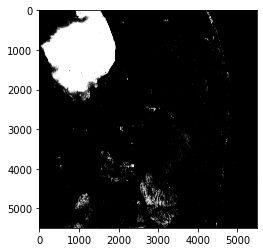

In [30]:
#Plotting the binary image
import matplotlib.pyplot as plt
plt.imshow(bin_image,'gray')

In [31]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('okeechobee_ndwi_lmc_t194.png',bin_image,cmap='gray')
print("saved")

saved


### Thresholding for Okeechobee lake NDWI_WC

In [32]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Okeechobee/'
image = Image.open(path + 'ndwi_wc.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  #print(i)
  grey_image.append(temp_row)

print("completed")

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


completed


In [33]:
#Converting grey_image into a numpy array
grey_image_arr = np.array(grey_image)

10980


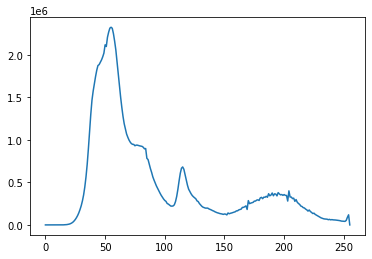

In [ ]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [34]:
#Creating binary image array with threshold = 106
bin_image = []
threshold = 110

count_one = 0
count_zero = 0

for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
      count_one = count_one + 1
    else:
      temp_row.append(0)
      count_zero = count_zero + 1

  #print(i)
  bin_image.append(temp_row)

density = count_one/count_zero

if density > 1:
  print("DENSE ARRAY")
elif density < 1:
  print("SPARSE ARRAY")
else:
  print("DENSITY = 1")

SPARSE ARRAY


In [35]:
#Generating Binary file of the binary image(numpy array)

file = open('okeechobee_ndwi_wc_binary_t110.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  #print(i)

file.close()

In [36]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('okeechobee_ndwi_wc_t110.png',bin_image,cmap='gray')
print("saved")

saved


### Thresholding for Okeechobee lake NDCI

In [37]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Okeechobee/'
image = Image.open(path + 'ndci.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  #print(i)
  grey_image.append(temp_row)

print("completed")

completed


5490


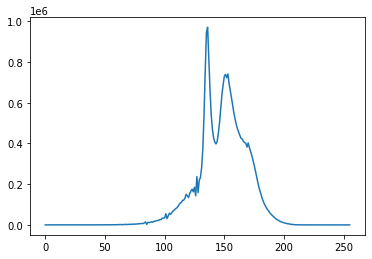

In [38]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [39]:
#Finding the exact occurance of the trough
start = 110

while start < 150:
  if freq[start] < freq[start - 1]:
    if freq[start] < freq[start + 1]:
      break
  start = start + 1

print(start)

120


In [40]:
#Creating binary image array with threshold = 150
bin_image = []
threshold = 150

count_one = 0
count_zero = 0

for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
      count_one = count_one + 1
    else:
      temp_row.append(0)
      count_zero = count_zero + 1

  #print(i)
  bin_image.append(temp_row)

density = count_one/count_zero

if density > 1:
  print("DENSE ARRAY")
elif density < 1:
  print("SPARSE ARRAY")
else:
  print("DENSITY = 1")

In [41]:
#Generating Binary file of the binary image(numpy array)

file = open('okeechobee_ndci_binary_t150.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  #print(i)

file.close()

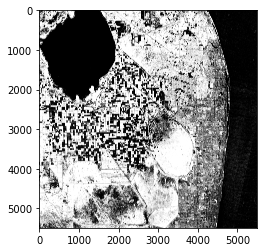

In [42]:
#Plotting the binary image
import matplotlib.pyplot as plt
plt.imshow(bin_image,'gray')

In [43]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('okeechobee_ndci_t150.png',bin_image,cmap='gray')
print("saved")

saved
